<a href="https://colab.research.google.com/github/kclassie/ML_sundries/blob/main/Keras_Model_3_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
'''Словарь: 0:человек, 1:идёт, 2:работать, 3:спать
Человек идёт работать [0,1,2] -> [1,1,1,0]
Спать идёт человек [3, 1, 0] -> [1, 1, 0,1]
'''
import numpy as np
def vectorizer(sequences, dimension):
  results = np.zeros([len(sequences), dimension])
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
    

In [ ]:
x_train = vectorizer(train_data, 10000)
x_test = vectorizer(test_data, 10000)

In [ ]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=500,
                    validation_data = (x_val, y_val))

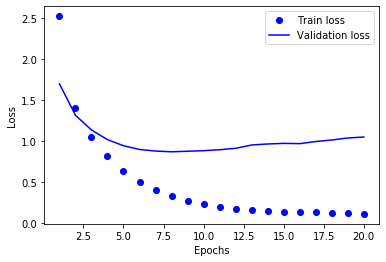

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
small_model = models.Sequential()
small_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
small_model.add(layers.Dense(16, activation='relu'))
small_model.add(layers.Dense(46, activation='softmax'))
small_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

small_history = small_model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=500,
                    validation_data = (x_val, y_val))

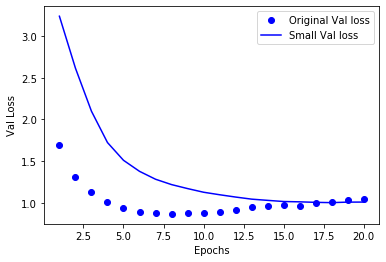

In [ ]:
small_loss = small_history.history['val_loss']
plt.plot(epochs, val_loss, 'bo', label='Original Val loss')
plt.plot(epochs, small_loss, 'b', label='Small Val loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()

plt.show()

In [ ]:
big_model = models.Sequential()
big_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
big_model.add(layers.Dense(512, activation='relu'))
big_model.add(layers.Dense(46, activation='softmax'))
big_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

big_history = big_model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=500,
                    validation_data = (x_val, y_val))

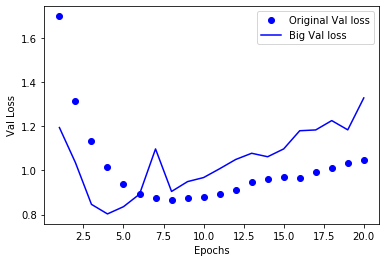

In [ ]:
big_loss = big_history.history['val_loss']
plt.plot(epochs, val_loss, 'bo', label='Original Val loss')
plt.plot(epochs, big_loss, 'b', label='Big Val loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()

plt.show()

In [ ]:
from keras import regularizers
l2_model = models.Sequential()
l2_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(10000,)))
l2_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
l2_model.add(layers.Dense(46, activation='softmax'))
l2_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

l2_history = l2_model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=500,
                    validation_data = (x_val, y_val))

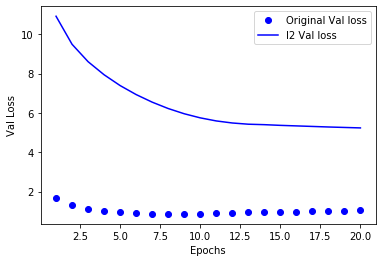

In [ ]:
l2_loss = l2_history.history['val_loss']
plt.plot(epochs, val_loss, 'bo', label='Original Val loss')
plt.plot(epochs, l2_loss, 'b', label='l2 Val loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()

plt.show()

In [ ]:
from keras import regularizers
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(64, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(46, activation='softmax'))
dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

dropout_history = dropout_model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=500,
                    validation_data = (x_val, y_val))

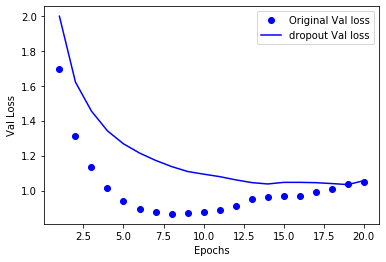

In [ ]:
dropout_loss = dropout_history.history['val_loss']
plt.plot(epochs, val_loss, 'bo', label='Original Val loss')
plt.plot(epochs, dropout_loss, 'b', label='dropout Val loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
np.argmax(prediction[0])

3

In [ ]:
np.argmax(model.predict(np.array([x_test[0]])))

3